In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

#prob statement - check wine quality

In [2]:
data = pd. read_csv("https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
#checking for null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [ ]:
#as alcohol contentlow. med, high- is categoprical data, we will have to convert it
#here we use the odinal encoder method as there is some order/rank to the data
#as we have categorical column
#Alcohol_Content), we need to convert into numeric data using encoding method.
#Content is following some order like Low, Med and High. We need to give weight according to the order.



In [4]:
from sklearn.preprocessing import OrdinalEncoder


In [5]:
ord_encoder=OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df1 = ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [6]:
#Override alcohol content column with codes. 
#checking a;cohol content column
data['Alcohol_content'] = df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


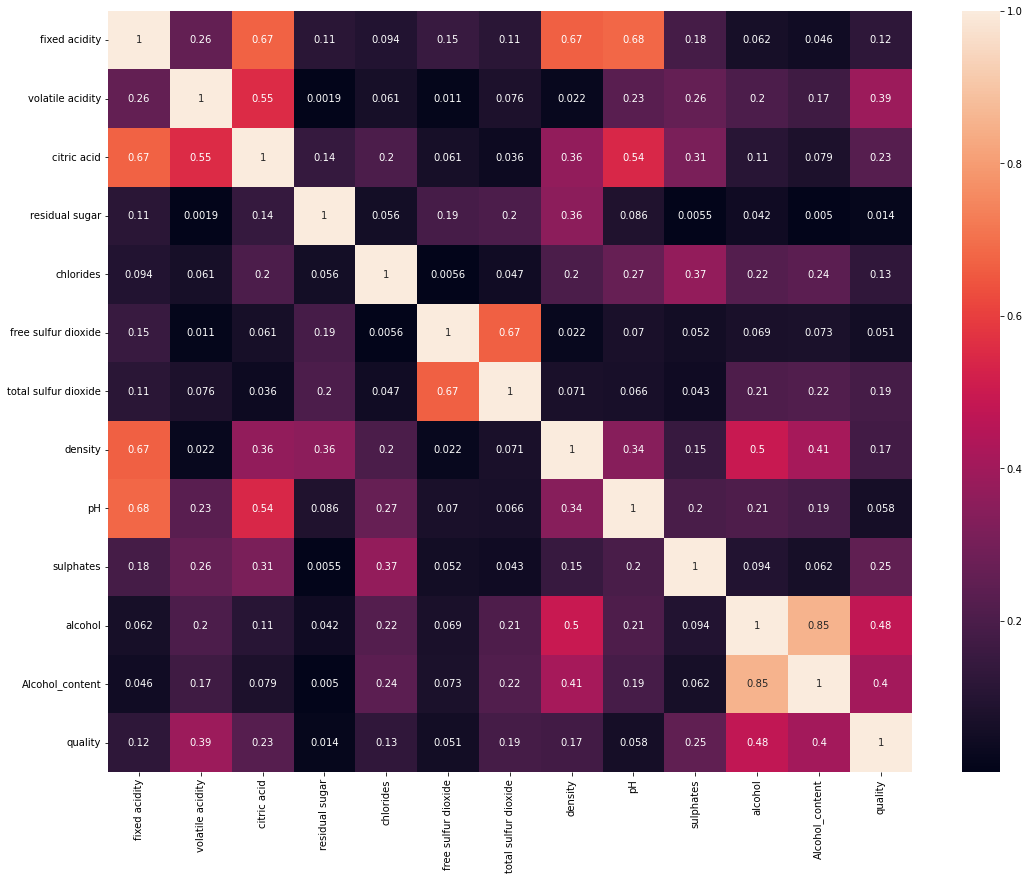

In [9]:
#Plotting Heatmap (Correlation matrix)
#Let's try to see if we can reduce the features using different techniques
#Let's plot heatmap to visualize and find the coefficient of multicollinearity
df_corr=data.corr().abs() #abs is absolute numbers
plt.figure(figsize=(18, 14))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()
#if it is close to 1 is positively related and close to -1 is negatively corelated
#heps eneasure relationship between different variables
#here u can compare feature vs feature as well as feature vs label

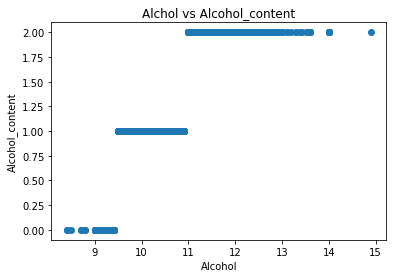

In [7]:
#sp citric acid is contributing 0.23% to the 'quality
#Seems like Alcohol_content and alcohol are correlated as per above heat map. But we need more proof.
plt.scatter(data.alcohol, data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alchol vs Alcohol_content')
plt.show()

In [33]:
#We see clear trend. As and when Alcohol level increases its content also increasing. So we can delete one of them.
#the darket the colors, the more loosely it  related
#we checked 85% as it as highest, usually above 75%, u check it, also with another method, 85 was sus[iciously high]
X = data.drop(columns = ['quality', 'Alcohol_content'])
y = data['quality']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 41) #by default it is 0.25 or 25%
#Let's first visualize the tree on the data without doing any pre processing'
#sure they are really correlated (It should follow some trend)

In [31]:
#Let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
#Let's see how the tree looks like (This is nothing to do with algorithm/accuracy). It's just for visualization
#purpose. #its just for demo, not solving purpose
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [14]:
import graphviz #this will give trouble so avoid this, this is not to be used, only for explanation purpose
from sklearn.tree import export_graphviz#this will give trouble so avoid this, this is not to be used, only for explanation purpose
from sklearn import tree
from IPython.display import Image
import pydotplus #this will give trouble so avoid this, this is not to be used, only for explanation purpose


In [13]:
!pip install graphviz

In [14]:
!pip install pydotplus

In [17]:
#create a dot file which stores the tree structure #demo purpose only
dot_data = export_graphviz(clf, feature_names = feature_name, rounded= True, filled = True)
# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())
#if does not work, see MyTree.png from git hub

InvocationException: GraphViz's executables not found

In [30]:
clf.score(x_train,y_train) # This is Training score


1.0

In [16]:
y_pred = clf.predict(x_test)
#Check the accuracy
accuracy_score(y_test,y_pred)


0.6075

In [ ]:
#Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
#GridSearchCV is a method used to tune our hyperparameters. 
#We can pass different values of hyperparameters as parameters for grid search. It
#does a exhaustive generation of combination of different parameters passed.
#Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.

In [ ]:
#What are hyper parameters?
#decision tree classifier algorithm takes all those parameters which are also known as hyperparameters.
#they r only theimp ones that impact your model
#Let's see the most important ones of the parameters(as per sklearn documentation):

In [73]:
#we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy.
#Let's go ahead and try to improve our model.
# We are tuning four Important hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'], #gave both options gini n entropy as we dont know which one is best here
    'max_depth': range(10,15),        # The maximum depth of the tree.  
    'min_samples_leaf': range(2,10),   #The minimum number of samples required to be at a Leaf node.
    'min_samples_split': range(3,10),   #The minimum number of samples required to split an internal node
    'max_leaf_nodes': range(2,4)          # best nodes r defined as to reduce impurity
    }

In [83]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs = -1) # Use all the cores in your system. For performance improvement.it gives the best depth-gridcv

In [84]:
grid_search

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2,
                                              min_samples_leaf=-2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [85]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2,
                                              min_samples_leaf=-2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [87]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [88]:
clf = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 80, min_samples_split =5, max_depth= 10, min_samples_leaf= 2)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10, max_leaf_nodes=80, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
#clf = Decision Tree Classifier (criterion = 'gini',max_leaf_nodes=80, min_samples_split =5,max_depth= 10, min_samples_Leaf= 2)
#clf.fit(x_train,y_train)

In [89]:
y_pred=clf.predict(x_test)
# Check the accuracy
accuracy_score(y_test,y_pred)


0.62

In [90]:
#Please Note- When you tune all the parameters there is a very good chance that
#you can improve the accuracy.
#Since Other parameters are default this combination is not giving better result. 
#You can play around with other numbers to improve the accuracy.

grid_param = {
    'criterion': ['gini', 'entropy'], #gave both options gini n entropy as we dont know which one is best here
    'max_depth': range(10,15),        # The maximum depth of the tree.  
    'min_samples_leaf': range(2,10),   #The minimum number of samples required to be at a Leaf node.
    'min_samples_split': range(3,10),   #The minimum number of samples required to split an internal node
    'max_leaf_nodes': range(5,10)          # best nodes r defined as to reduce impurity.best one is 7(as below). so we increase the nodes here, from (2,4)
    }

In [91]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs = -1)

In [92]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=80,
                                              min_samples_leaf=2,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [93]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [96]:
#you can remove the samples leaf nodes as it tends to go wrong, however increase it in your range, increasign range from 2, 4 to 5, 10
#also take the best param values that u found. 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 2, min_samples_split =3, max_depth= 10)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [97]:
y_pred=clf.predict(x_test)
# Check the accuracy
accuracy_score(y_test,y_pred) #it is still giving same value, no increase

0.62

In [114]:
#will u be able to change accurachy by canging the 'split"' and leaf sample
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split =2, max_depth= 10)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [115]:
y_pred=clf.predict(x_test)
# Check the accuracy
accuracy_score(y_test,y_pred) #it is still giving same value, no increase

0.62

In [ ]:
#the original worldks the best as both are same.

In [ ]:
#steps for boosting
#1. Training Sample - 1st weak classifier
#2. Weighted Sample - 2nd weak classifier
#3. Weighted Sample - 3rd weak classifier
#4. Weighted Sample - M-th weak classifier
#5. Final Classifier

#Boosting
#Boosting is an ensemble approach(meaning it involves several trees) that starts from a weaker decision 
#and keeps on building the models such that the final
#prediction is the weighted sum of all the weaker decision-makers. 
#The weights are assigned based on the performance of an individual tree.
#Ensemble parameters are calculated in stagewise way which means that while calculating the subsequent weight,
#the learning from the previous tree is considered as well.

In [ ]:
#Weak classifier - why tree?
#First what is a weak classifier? Weak classifier - slightly better than random guessing.
#Any algorithm could have been used as a base for the boosting technique, but the reason for choosing trees are:
#Con's
#inability to extract a linear combination of features
#high variance leading to a small computational power
#Pro's
#computational scalability.
#handles missing values,
#robust to outliers,
#does not require feature scaling,
#can deal with irrelevant inputs,
#interpretable (if small),
#handles mixed predictors as well (quantitive and qualitative
#And that's where boosting comes into the picture. 
#It minimises the variance by taking into consideration the results from various trees.


In [ ]:
#we ue week classifier as e can start from scratch. instead of starting from the middle
#week is the first model.it gves the complete pocture
#diff between boostong n bagging is that...bagging takes the majority of the results,
#say model1, 2, 3....-out of these 6, 4 of them said 'yes', so the ones that said 'yes ' will be taken into consideration

In [118]:
#For understanding this algorithm, we'll use the following simple dataset for heart patient prediction.
#ADABOOST
import pandas as pd
heart_data= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
heart_data


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#There are a total of 8 rows in our dataset
#Hence, we'll initialize the sample weights w=1/N as 1/8 in the beginning. And, at the beginning, all the
#samples are equally important.

In [ ]:
#now calculate the Gini index of the individual stumps using the formula
#G.I= (weightofthedecision)*(1-(p² + (1 - p)²))
#G.I for chest pain tree= 0.47
#G.I for blocked arteries tree= 0.5
#G.I for body-weight tree 0.2 = since this is the lowest one, this will be taken for gini, gini fornula in prev lecture

#And, we select the tree with the lowest Gini Index. This will be the first decision-maker for our model.
#We'll now calculate the new weights using the formula:
#Contribution=1/2(log(1-totalerror)/totalerror)

#As this stump classified only one data incorrectly out of the 8, hence the total error is 1/8.
#Putting this into the formula we get contribution= 0.97

#Now, we'll calculate the contribution of this tree(stump) to our final decision using the formula:
#Increase the sample weight for incorrectly classified datapoints New weight= old weighte^ contribution= 1/8 e^+  0.97=-0.33
#Decrease the sample weight for correctly classified datapoints New weight old weighte^ contribution-= 1/8 e^- 0.97=0.05
#Populate the new weights as shown below:
   

In [119]:
#Importing the Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')


In [122]:
#Initializing the dataframe
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')
# See head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#CRIM per capita crime rate by town
#ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS proportion of non-retail business acres per town
#CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX nitric oxides concentration (parts per 10 million)
#RM average number of rooms per dwelling
#AGE proportion of owner-occupied units built prior to 1940
#DIS weighted distances to five Boston employment centres
#RAD index of accessibility to radial highways
#TAX full-value property-tax rate per 10,000usd
#PTRATIO pupil
#teacher ratio by town
#B 1000(Bk -0.63)^2 where Bk is the proportion of blacks by town
#LSTAT% lower status of the population

In [123]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [124]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [126]:
#finding correlation
corr=data.corr()
corr.shape

(14, 14)

In [127]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


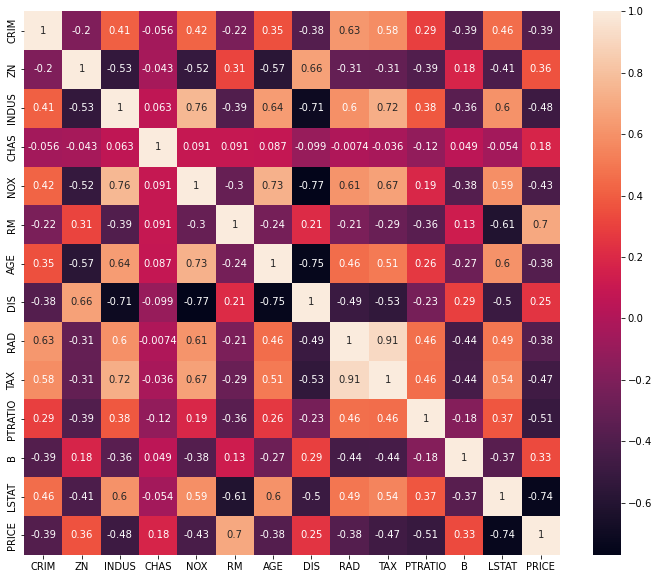

In [129]:
#Plotting the heatmap of correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()


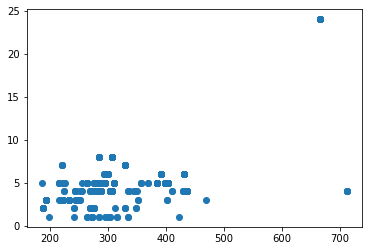

In [130]:
#Seems RAD and TAX are correlated
#Lets check with scatter plot
plt.scatter(data. TAX, data.RAD)
plt.show()
# dividing feature and Label data
#Since we cannot confirm with plot that, there is a close relation. So we will not take risk and not deleting any features.

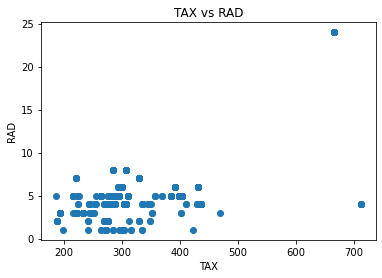

In [131]:
plt.scatter(data.TAX, data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()
#Since we cannot confirm with plot that, there is a close relation. So we will not take risk and not deleting any features.
#if in corr it is more than 90 or a single figure is high, u check for correlation by scatter plot

In [135]:
# dividing feature and Label data
X = data.drop(columns=['PRICE'], axis = 1)
y= data['PRICE']


In [137]:
# train test split (hold out method)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.25, random_state = 100)

In [139]:
from sklearn.ensemble import AdaBoostRegressor #good for regression - boosting.bagging ,sometimes only classifcation

In [140]:
ada = AdaBoostRegressor()

In [141]:
ada. fit (X_train,y_train)

AdaBoostRegressor()

In [142]:
#Model prediction on train data
y_pred = ada.predict(X_train) #with x train

In [143]:
accuracy = metrics.r2_score(y_train, y_pred)
print('R square score', accuracy)

R square score 0.9051599310381861


In [146]:
#Since model has already seen the data, so it is producing better score.
#Predicting Test data with the model
y_test_pred = ada.predict(X_test) #this time with x test

In [147]:
#Model Evaluation
accuracy = metrics.r2_score(y_test, y_test_pred)
print('R square score:', accuracy)

R square score: 0.8405614634804985


In [149]:
#Hyperparameter Tuning using Randomized SearchCV
#diff between grid search cv and randomised searchCV is that grid search seesnall combinations individually for accuracy while random just selects random
#if data ids very hufe, random is recommended
from sklearn.model_selection import RandomizedSearchCV

In [164]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]} #estimators can be any rate, u can also keep a range of (30, 200)
#learning rate always starts with 0.01 or 0.1, however these nuners should not cross 1. it shd be < 1

In [165]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions=params)

In [159]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [160]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=47)

In [167]:
ada=AdaBoostRegressor(learning_rate=0.3,n_estimators=60)
ada.fit(X_train,y_train) #this is our score
y_pred= ada.predict(X_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,y_pred))

*****accuracy post tuning*****
0.8041171235929792


In [168]:
#now let us use recommended estimators given, in best estimators-n0.4 and 47
ada=AdaBoostRegressor(learning_rate=0.4,n_estimators=47)
ada.fit(X_train,y_train)
y_pred= ada.predict(X_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,y_pred))

*****accuracy post tuning*****
0.8585284518961502


In [ ]:
#GRADIENT

In [ ]:
#r2 is around 84, we increased by 1. we can also play with learning rate, close to estimated, figures, 
#we can say take even 0.5 to see if accuracy hets better
understanding this algorithm we'll use the following simple dataset for weight prediction
Person Height (in metres) Person Favorite Colour Person Gender Person Weight (in kg)
1.6                              Blue               Male                 88
1.6                             Green               Female               76
1.5                              Blue               Female               56
1.8                               Red               Male                 73
1.5                              Green              Male                 77
1.4                               Blue            FeMale                 57


For the first iteration, calculate the average of the target column(weight here) as it minimizes the residual initially.
Average=(88+76+56+73+77+57)/6=71.2

Person Height(in metres) Person Favorite Colour Person Gender Person Weight (in Kg) Predicted weight

#weight is label and others are features 

In [ ]:
# 2 more columns added- predicted and residual values 
Predicted weight               Residual
71.2                             16.8
71.2                              4.8                     
71.2                              -15.2
71.2                              1.8
71.2                              5.8
71.2                              -14.2
#We consider this as the first prediction and then we'll calculate the residual which is the difference between the predicted and the actual value as
#below: a tree is built
#now a tree is build on the residuals. 
#Now for prediction, we use the formula
#New value=old value+learning rate* residual
#If we consider the learning rate as 0.1, the result becomes.
#New value= 71.2+0.1*16.8=72.9) (for the first row).#we have taken 0.1 as a place holder for learnng values as it shd start fromt hat as above
#Similarly the new predictions for all the rows is calculated.
#The above steps are repeated until there is no significant improvement in residuals or until we reach number of estimators

#72.9 is the new residual
#now , new predction is actual minus new precdiction, which is 15.1
#so its 16. 8 as old and 15.12 as new

#final result is given by
#Final Value First Prediction+learning rate* 1st residual+ learning rate 2nd residual+ and so on
#i.e Final Value = 71.2 + (0.1*15.12) + (0.1 4.32) + (0.1 -13.68) + (0.1 1.62)+ so on


#at some poit it has to stop, it depends onparameter predicted

In [170]:
#GRADIENT BOOSTING TREES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
#sns.set_style("whitegrid")

In [172]:
heart_data= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
heart_data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [198]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [175]:
heart_data.drop('Unnamed: 0',axis=1, inplace=True) #dropping unamed column
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [176]:
heart_data.isna().sum() #checking for nulls

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [179]:
# Just find correlation of feature vs target using corrwith
heart_data.drop('target', axis=1).corrwith(heart_data.target)


age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

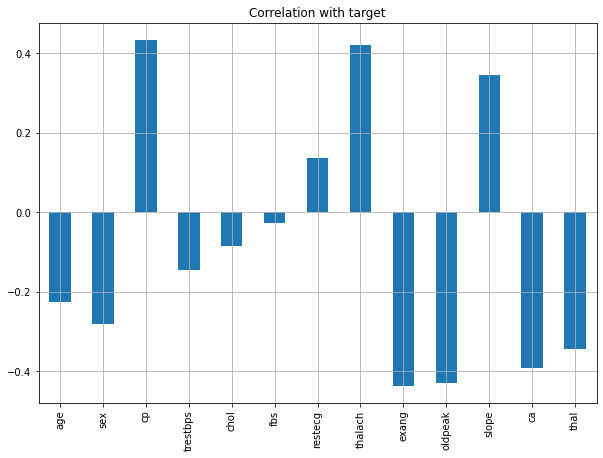

In [180]:
#Visualize the correlation.
#take the data above in corr as it is and plot it
#the code is same asabove and changes after - '.plot'
heart_data.drop('target', axis=1).corrwith(heart_data.target).plot(kind='bar', grid=True, figsize=(10, 7),
                                                                   title="Correlation with target")
plt.show()
#Let's work on feature selection and see if that can help us building better model.

In [181]:
#in case u r still very confused about which features to take, u use the select percentile method'
from sklearn. feature_selection import SelectPercentile
from sklearn. feature_selection import chi2
#When we apply chi2, we get p-values for all features. Based on the p-values, it will select top 80% of features.

#Example - If p-value < 0.05, it will reject null hypothesis. Default null hypothesis is, there is no relation
#b/w feature and target
#SPercentile = Select Percentile (score_func-chi2, percentile=80)

In [186]:
#Instantiate SelectPercentile and fit (feature, Label)
X = heart_data.drop(['target'], axis=1)
y=heart_data.target
SPercentile=SelectPercentile(score_func=chi2, percentile=80) #we can select 80, 75 or even 85 dpendign on the graph we drew above. 100 percent is accurate but we dont want 100% features to be selected even though it increases accuracy 
SPercentile=SPercentile.fit(X, y)

In [187]:
#Seperate the features to check p-values
cols = SPercentile.get_support(indices=True) # to return index numbers instead of boolean, we mention indices
print ('Feature Index = ',cols)
features=X.columns[cols]
print ('Features=',list(features))


Feature Index =  [ 0  1  2  3  4  7  8  9 10 11]
Features= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [188]:
#Let's print the top 80% features acc to value of importance
heart_data_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': SPercentile.scores_, 'pValue': SPercentile.pvalues_})
heart_data_scores.sort_values(by='Chi2Score', ascending=False)
#thalach is the most impactful one, lowest correlation, even thogh in graph it is second highest, the co-variance also matters
#it has lowest corelation and pvalue, which means it rejects the hypothesis

,features,Chi2Score,pValue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [189]:
# Create subset of selected features
#now u will print the top 80%
X=heart_data[features]
y=heart_data.target

In [191]:
#Import Libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42) #0.3 test size is 30%

In [193]:
#GradientBoostingClassifier and #gradient boosting tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [206]:
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred=gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("\n================Train Result ===============")
print(f"Accuracy Score:{accuracy_score(y_train, pred)*100:.2f}%") #2f is 2 decimal places
print("_________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, pred)}\n")
#**************************************Test score*****************************************
pred=gbdt_clf.predict(X_test)#coe is same, starting pred onwards, its just X_train instead of test
clf_report=pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("\n‒‒‒‒‒‒‒‒‒‒‒‒‒Test Result--‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒")
print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
print("====================================================================================")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("====================================================================================")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") #the code is same from above


================Train Result ===============
Accuracy Score:100.00%
_________________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
Confusion Matrix:
[[ 97   0]
 [  0 115]]


‒‒‒‒‒‒‒‒‒‒‒‒‒Test Result--‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒‒
Accuracy Score: 83.52%
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
Confusion Matrix: 
 [[34  7]
 [ 8 42]]



In [212]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
'learning_rate': np.arange(0.1,0.3) #it can go upto 1
}

In [213]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [215]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}

In [220]:
gbdt_clf=GradientBoostingClassifier(
    max_depth=4, min_samples_split=2, learning_rate=0.1)
gbdt_clf.fit(X_train, y_train)
pred=gbdt_clf.predict(X_train)
gbdt_c1f_report=pd.DataFrame(
    classification_report(y_train, pred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)} \n")

#***********************Test score******************************************
pred=gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(
    classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



================Train Result======================
Accuracy Score: 100.00%
____________________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
____________________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]] 


=================Test Result ==========================
Accuracy Score: 82.42%
____________________________________________________
CLASSIFICATION REPORT: 
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000   

In [226]:
#now it is lower than earlier which was 83.52%
#lets change the leanrign rate to 0.05 from 0.1
#gradientBoosting Tree
gbdt_clf=GradientBoostingClassifier(
    max_depth=4, min_samples_split=2, learning_rate=0.05)
gbdt_clf.fit(X_train, y_train)
pred=gbdt_clf.predict(X_train)
gbdt_c1f_report=pd.DataFrame(
    classification_report(y_train, pred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)} \n")

#***********************Test score******************************************
pred=gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(
    classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


================Train Result======================
Accuracy Score: 100.00%
____________________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
____________________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]] 


=================Test Result ==========================
Accuracy Score: 84.62%
____________________________________________________
CLASSIFICATION REPORT: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.800000   0.891304  0.846154   0.845652      0.850167
recall      0.878049   0.820000  0.846154   0.849024      0.846154
f1-score    0.837209   0.854167  0.846154   0.845688      0.846527
support    41.000000  50.000000  0.

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
data.head()